## Variance Estimation 

In statistics we know that the mean and variance of a population $Y$ are defined to be:

\begin{equation}
\left\{
\begin{aligned}
    \text{Mean}(Y) &= \mu = \frac{1}{N} \sum_{i=1}^{N} Y_i \\
    \text{Var}(Y) &= \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \mu)^2 \\
\end{aligned}
\right.
\end{equation}

where $N$ is the size of the population.
<!-- PELICAN_END_SUMMARY -->

Given the population $Y$, we can draw a sample $X$ and compute statistics for $X$:

\begin{equation}
\left\{
\begin{aligned}
    \text{Mean}(X) &= \bar{X} = \frac{1}{n} \sum_{j=1}^{n} X_j \\
    \text{Var}(X) &= s^2 = \frac{1}{n - 1} \sum_{j=1}^{n} (X_j - \bar{X})^2 \\
\end{aligned}
\right.
\end{equation}

where lowercase $n$ is the size of the sample, typically a much smaller number than $N$. One detail that is often not clearly explained in introductory statistics is why we should divide by $n - 1$ instead of $n$ in the calculation for the sample variance.

## Why divide by n - 1?

It turns out that we should divide by $n - 1$ because dividing by $n$ would give us a **biased estimator** of the population variance. Let's look at a concrete example before diving into the math for why. Let's say we have a population of 100,000 data points. These can represent, for instance, a movie rating for each of 100,000 people.  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(15, 5)

In [2]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(42)

In [4]:
N = 100000  # size of population

In [5]:
population = pd.Series(np.random.randint(1, 11, N))

We can easily calculate the **population mean** and **population variance**:

In [6]:
population.mean()

5.5155599999999998

In [7]:
((population - population.mean()) ** 2).sum() / N

8.2592178864000001

Note that we are dividing by $N$ in the variance calculation, also that in `numpy` or `pandas` this is the same as simply using the method `var` with `ddof=0`

In [8]:
population.var(ddof=0)

8.2592178864000001

where `ddof=0` means to divide by $N$, and `ddof=1` means to divide by $N - 1$.

## Simulation

As usual in statistics, the population parameters are often unknown. But we can estimate them by drawing samples from the population. Here we are drawing a random sample of size $30$. As of version `0.16.1`, `pandas` has a convenient `Series.sample()` function for this:

In [9]:
samples = {}
n = 30  # size of each sample
num_samples = 500  # we are drawing 500 samples, each with size n
for i in range(num_samples):
    samples[i] = population.sample(n).reset_index(drop=True)

In [10]:
samples = pd.DataFrame(samples)
samples.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
495,4,6,3,7,9,1,3,6,8,7,...,2,9,4,5,3,1,3,5,9,6
496,8,3,5,4,7,6,10,4,1,5,...,5,8,1,5,3,10,2,5,9,2
497,8,4,7,5,3,10,5,7,9,2,...,6,9,10,3,10,3,2,6,5,8
498,3,3,6,6,1,4,6,8,10,8,...,8,1,3,8,3,6,4,9,7,3
499,10,5,1,3,10,7,3,6,8,9,...,7,7,7,4,9,6,7,8,9,2


As we expect, if we average all the sample means we can see that the it is a good estimate for the true population mean:

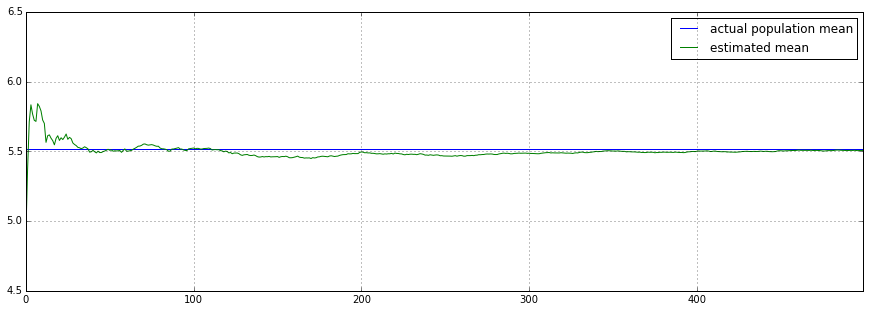

In [11]:
df = pd.DataFrame({'estimated mean': pd.expanding_mean(samples.mean()),
                   'actual population mean': pd.Series(population.mean(), index=samples.columns)})
df.plot(ylim=(4.5, 6.5))

Now let's compare the results we would get by using the **biased estimator** (dividing by $n$) and the **unbiased estimator** (dividing by $n-1$)

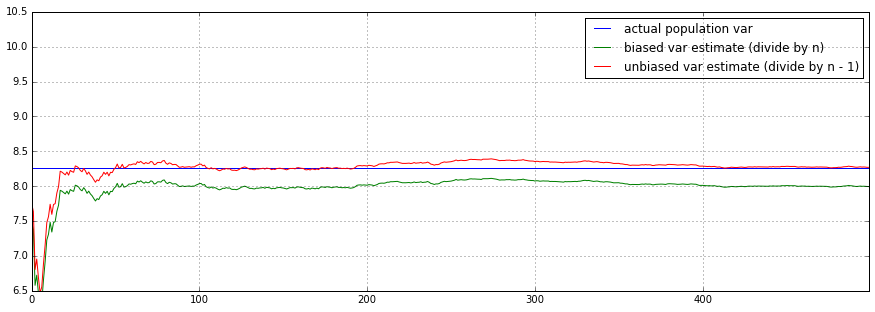

In [12]:
df = pd.DataFrame({'biased var estimate (divide by n)': pd.expanding_mean(samples.var(ddof=0)),
                   'unbiased var estimate (divide by n - 1)': pd.expanding_mean(samples.var(ddof=1)),
                   'actual population var': pd.Series(population.var(ddof=0), index=samples.columns)})
df.plot(ylim=(6.5, 10.5))

We can see that the biased estimator (dividing by $n$) is clearly not estimating the true population variance as accurately as the unbiased estimator (dividing by $n-1$). 

## Mathematical Proof

To prove that dividing by $n - 1$ is an unbiased estimator, we need to show that expected value of the estimaor is indeed $\sigma^2$:
\begin{equation}
    E(s^2) = E\left(\frac{1}{n - 1} \sum_{j=1}^{n} (X_j - \bar{X})^2\right) = \sigma^2
\end{equation}

First we'll need to recall a few basic properties of expectation and variance:

\begin{equation}
\left\{
\begin{aligned}
    & E(Z_1 + Z_2) = E(Z_1) + E(Z_2), \text{ for any } Z_1, Z_2 \\
    & \text{Var}(a Z) = a^2 \text{Var}(Z), \text{ for any } Z \\
    & \text{Var}(Z_1 + Z_2) = \text{Var}(Z_1) + \text{Var}(Z_2), \text{ if } Z_1 \text{ and } Z_2 \text{ are independent} \\
\end{aligned}
\right.
\end{equation}

Also, the following is a useful form for variance:
\begin{equation}
    \text{Var}(Z) = E((Z - E(Z))^2) = E(Z^2 - 2ZE(Z) + E(Z)^2) = E(Z^2) - E(Z)^2
\end{equation}

This is equivalent to
\begin{equation}
    E(Z^2) = \text{Var}(Z) + E(Z)^2
\end{equation}

Using the above properties we can now simplify the expression for $E(s^2)$:

\begin{aligned}
    E(s^2) = E\left(\frac{1}{n - 1} \sum_{j=1}^{n} (X_j - \bar{X})^2\right) = & \frac{1}{n - 1} E \left( \sum_{j=1}^{n} (X_j^2 - 2X_j\bar{X} + \bar{X}^2) \right) \\
    = & \ \frac{1}{n - 1} E \left( \sum_{j=1}^{n} X_j^2 - 2n\bar{X}^2 + n\bar{X}^2 \right) \\
    = & \ \frac{1}{n - 1} E \left( \sum_{j=1}^{n} X_j^2 - n\bar{X}^2 \right) \\
    = & \ \frac{1}{n - 1} \left[ E \left( \sum_{j=1}^{n} X_j^2 \right) - E \left( n\bar{X}^2 \right) \right] \\
    = & \ \frac{1}{n - 1} \left[ \sum_{j=1}^{n} E \left( X_j^2 \right) - n E \left( \bar{X}^2 \right) \right] \\
\end{aligned}

Now notice that the first term can be simplied as:

\begin{aligned}
    \sum_{j=1}^{n} E \left( X_j^2 \right) = & \sum_{j=1}^{n} \left( Var(X_j) + E(X_j)^2 \right) \\
    = & \sum_{j=1}^{n} \left( \sigma^2 + \mu ^2 \right) \\
    = & \ n \sigma^2 + n \mu ^2 \\
\end{aligned}

Using the same trick, the second term becomes:

\begin{aligned}
    E(\bar{X}^2) = & \ Var(\bar{X}) + E(\bar{X})^2 \\
    = & Var(\frac{1}{n} \sum_{j=1}^{n} X_j) + \mu ^2 \\
    = & \frac{1}{n^2} Var(\sum_{j=1}^{n} X_j) + \mu ^2 \\
    = & \frac{1}{n^2} \sum_{j=1}^{n} Var(X_j) + \mu ^2, \text{ because all } X_j\text{'s are independent} \\
    = & \frac{1}{n^2} n\sigma^2 + \mu ^2 \\
    = & \frac{1}{n} \sigma^2 + \mu ^2 \\
\end{aligned} 

Plugging the two terms back we finally get:

\begin{aligned}
    E(s^2) = & \ \frac{1}{n-1} \left[ \sum_{j=1}^{n} E \left( X_j^2 \right) - n E \left(\bar{X}^2 \right) \right] \\
    = & \ \frac{1}{n-1} \left[n \sigma^2 + n \mu ^2 - n \left( \frac{1}{n} \sigma^2 + \mu ^2 \right) \right] \\
    = & \ \frac{1}{n-1} \left[n \sigma^2 + n \mu ^2 - \sigma^2 - n \mu ^2 \right] \\
    = & \ \sigma^2 \\
\end{aligned}

Dividing by $n-1$ gives us an unbiased estimate for the population variance indeed!

## Source of Bias

One intuitive way to think about why the bias exists is to notice that we generally don't actually know the true population mean $\mu$, and therefore the sample variance is being computed using the *estimated* mean $\bar{X}$. However the quadratic form $\sum_{j=1}^{n} (X_j - a)^2$ is actually minimized by $a = \bar{X}$, which means that whatever the true population mean $\mu$ is, we will always have

\begin{equation}
    \sum_{j=1}^{n} (X_j - \mu)^2 \geq \sum_{j=1}^{n} (X_j - \bar{X})^2
\end{equation}

Therefore we are underestimating the true variance because we don't know the true mean.

In fact, we can see that we are underestimating by exactly $\sigma^2$ on average:

\begin{aligned}
    E\left(\sum_{j=1}^{n} (X_j - \mu)^2\right) = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X} + \bar{X} - \mu)^2\right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 + \sum_{j=1}^{n} 2(X_j - \bar{X})(\bar{X} - \mu) + \sum_{j=1}^{n} (\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 + \sum_{j=1}^{n} (\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + E \left(\sum_{j=1}^{n} (\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + \sum_{j=1}^{n} E \left((\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + \sum_{j=1}^{n} \left( \text{Var} (\bar{X} - \mu) + E (\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + \sum_{j=1}^{n} \left( \text{Var} (\bar{X}) + E (\bar{X} - \mu)^2 \right) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + \sum_{j=1}^{n} \text{Var} (\bar{X}) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + n \text{Var} (\bar{X}) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + n \text{Var} (\frac{1}{n} \sum_{j=1}^{n} X_j) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + n \frac{1}{n^2} \sum_{j=1}^{n} \text{Var} (X_j) \\
    = & \ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2 \right) + \sigma^2 \\
\end{aligned}

Combined with the result we have from the proof in the previous section, we can see that if we somehow *magically knew* the true mean $\mu$, dividing by $n$ would be unbiased:

\begin{aligned}
    E\left(\frac{1}{n} \sum_{j=1}^{n} (X_j - \mu)^2\right) = & \ \frac{1}{n} E \left(\sum_{j=1}^{n} (X_j - \mu)^2\right) \\
    = & \ \frac{1}{n} \left[ E \left(\sum_{j=1}^{n} (X_j - \bar{X})^2\right) + \sigma^2 \right] \\
        = & \ \frac{1}{n} \left[ (n - 1) \sigma^2 + \sigma^2 \right] \\
    = & \ \sigma^2 \\
\end{aligned}

However since we don't know the true mean and are using the estimated mean $\bar{X}$ instead, we'd need to divide by $n - 1$ to correct for the bias. This is also known as [Bessel's correction](http://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). 
